# 2章 テキストの前処理を学ぼう

In [ ]:
# 正規表現
# match
import re
email = "abc@xxx.com"
match_string = re.match(r"[a-z]+@[a-z]+\.[a-z]+", email)
print(match_string)

<re.Match object; span=(0, 11), match='abc@xxx.com'>


In [ ]:
print(f"start:{match_string.start()}")
print(f"end:{match_string.end()}")
print(f"span: {match_string.span()}")
print(f"group: {match_string.group()}")

start:0
end:11
span: (0, 11)
group: abc@xxx.com


In [ ]:
# findall
emails = 'abc@xxx.com def@yyy.com'
match_list = re.findall(r"[a-z]+@[a-z]+\.[a-z]+", emails)
print(match_list)

['abc@xxx.com', 'def@yyy.com']


In [ ]:
# sub
email = "abc@xxx.com"
replace_string = re.sub("[a-z]+@", "ABC@", email)
print(replace_string)

ABC@xxx.com


In [ ]:
# テキストクリーニング(m)
text = '[重要です!] 明日, 必ず連絡を下さい。'
result = re.sub(r"[【】!]", " ", text)
print(result)

[重要です ] 明日, 必ず連絡を下さい。


## Beautiful Soup4

In [ ]:
pip install bs4

In [ ]:
from bs4 import BeautifulSoup
from urllib import request

url = 'https://www.aozora.gr.jp/cards/000879/files/128_15261.html'
response = request.urlopen(url)
soup = BeautifulSoup(response)
response.close()

print(soup)

<?xml version="1.0" encoding="Shift_JIS"?><!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.1//EN" "http://www.w3.org/TR/xhtml11/DTD/xhtml11.dtd">
<html xml:lang="ja" xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<meta content="text/css" http-equiv="content-style-type"/>
<link href="../../aozora.css" rel="stylesheet" type="text/css"/>
<title>芥川龍之介 羅生門</title>
<script src="../../jquery-1.4.2.min.js" type="text/javascript"></script>
<link href="http://purl.org/dc/elements/1.1/" rel="Schema.DC"/>
<meta content="羅生門" name="DC.Title"/>
<meta content="芥川龍之介" name="DC.Creator"/>
<meta content="青空文庫" name="DC.Publisher"/>
</head>
<body>
<div class="metadata">
<h1 class="title">羅生門</h1>
<h2 class="author">芥川龍之介</h2>
<br/>
<br/>
</div>
<div id="contents" style="display:none"></div><div class="main_text"><br/>
　<ruby><rb>或日</rb><rp>（</rp><rt>あるひ</rt><rp>）</rp></ruby>の暮方の事である。一人の下人が、<ruby><rb>羅生門</rb><rp>（</rp><rt>らしやうもん</rt><rp>）</rp></r

<ipython-input-9-fa5c755349dd>:6: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  soup = BeautifulSoup(response)


In [ ]:
main_text = soup.find("div", class_="main_text")
print(type(main_text))
print(main_text)

<class 'bs4.element.Tag'>
<div class="main_text"><br/>
　<ruby><rb>或日</rb><rp>（</rp><rt>あるひ</rt><rp>）</rp></ruby>の暮方の事である。一人の下人が、<ruby><rb>羅生門</rb><rp>（</rp><rt>らしやうもん</rt><rp>）</rp></ruby>の下で雨やみを待つてゐた。<br/>
　廣い門の下には、この男の<ruby><rb>外</rb><rp>（</rp><rt>ほか</rt><rp>）</rp></ruby>に誰もゐない。唯、所々<ruby><rb>丹塗</rb><rp>（</rp><rt>にぬり</rt><rp>）</rp></ruby>の剥げた、大きな<ruby><rb>圓柱</rb><rp>（</rp><rt>まるばしら</rt><rp>）</rp></ruby>に、<ruby><rb>蟋蟀</rb><rp>（</rp><rt>きり／″＼す</rt><rp>）</rp></ruby>が一匹とまつてゐる。<ruby><rb>羅生門</rb><rp>（</rp><rt>らしやうもん</rt><rp>）</rp></ruby>が、<ruby><rb>朱雀大路</rb><rp>（</rp><rt>すじやくおおぢ</rt><rp>）</rp></ruby>にある<ruby><rb>以上</rb><rp>（</rp><rt>いじやう</rt><rp>）</rp></ruby>は、この男の外にも、<ruby><rb>雨</rb><rp>（</rp><rt>あめ</rt><rp>）</rp></ruby>やみをする<ruby><rb>市女笠</rb><rp>（</rp><rt>いちめがさ</rt><rp>）</rp></ruby>や揉烏帽子が、もう二三<ruby><rb>人</rb><rp>（</rp><rt>にん</rt><rp>）</rp></ruby>はありさうなものである。それが、この<ruby><rb>男</rb><rp>（</rp><rt>をとこ</rt><rp>）</rp></ruby>の<ruby><rb>外</rb><rp>（</rp><rt>ほか</rt><rp>）</rp></ruby>には<ruby><rb>誰</rb

In [ ]:
tag_to_delete: list = main_text.find_all(["rp", "rt"])
for tag in tag_to_delete:
    tag.decompose()
print(main_text)

<div class="main_text"><br/>
　<ruby><rb>或日</rb></ruby>の暮方の事である。一人の下人が、<ruby><rb>羅生門</rb></ruby>の下で雨やみを待つてゐた。<br/>
　廣い門の下には、この男の<ruby><rb>外</rb></ruby>に誰もゐない。唯、所々<ruby><rb>丹塗</rb></ruby>の剥げた、大きな<ruby><rb>圓柱</rb></ruby>に、<ruby><rb>蟋蟀</rb></ruby>が一匹とまつてゐる。<ruby><rb>羅生門</rb></ruby>が、<ruby><rb>朱雀大路</rb></ruby>にある<ruby><rb>以上</rb></ruby>は、この男の外にも、<ruby><rb>雨</rb></ruby>やみをする<ruby><rb>市女笠</rb></ruby>や揉烏帽子が、もう二三<ruby><rb>人</rb></ruby>はありさうなものである。それが、この<ruby><rb>男</rb></ruby>の<ruby><rb>外</rb></ruby>には<ruby><rb>誰</rb></ruby>もゐない。<br/>
　<ruby><rb>何故</rb></ruby>かと云ふと、この二三年、京都には、<ruby><rb>地震</rb></ruby>とか辻風とか火事とか饑饉とか云ふ<ruby><rb>災</rb></ruby>がつゞいて起つた。そこで<ruby><rb>洛中</rb></ruby>のさびれ<ruby><rb>方</rb></ruby>は一通りでない。舊記によると、佛像や佛具を<ruby><rb>打砕</rb></ruby>いて、その<ruby><rb>丹</rb></ruby>がついたり、金銀の<ruby><rb>箔</rb></ruby>がついたりした木を、路ばたにつみ重ねて、<ruby><rb>薪</rb></ruby>の<ruby><rb>料</rb></ruby>に賣つてゐたと云ふ事である。<ruby><rb>洛中</rb></ruby>がその始末であるから、羅生門の<ruby><rb>修理</rb></ruby>などは、元より誰も捨てゝ<ruby><rb>顧</rb></ruby>る者がなかつた。するとその<rub

In [ ]:
main_text = main_text.get_text()
print(main_text)


　或日の暮方の事である。一人の下人が、羅生門の下で雨やみを待つてゐた。
　廣い門の下には、この男の外に誰もゐない。唯、所々丹塗の剥げた、大きな圓柱に、蟋蟀が一匹とまつてゐる。羅生門が、朱雀大路にある以上は、この男の外にも、雨やみをする市女笠や揉烏帽子が、もう二三人はありさうなものである。それが、この男の外には誰もゐない。
　何故かと云ふと、この二三年、京都には、地震とか辻風とか火事とか饑饉とか云ふ災がつゞいて起つた。そこで洛中のさびれ方は一通りでない。舊記によると、佛像や佛具を打砕いて、その丹がついたり、金銀の箔がついたりした木を、路ばたにつみ重ねて、薪の料に賣つてゐたと云ふ事である。洛中がその始末であるから、羅生門の修理などは、元より誰も捨てゝ顧る者がなかつた。するとその荒れ果てたのをよい事にして、狐狸が棲む。盗人が棲む。とうとうしまひには、引取り手のない死人を、この門へ持つて來て、棄てゝ行くと云ふ習慣さへ出來た。そこで、日の目が見えなくなると、誰でも氣味を惡るがつて、この門の近所へは足ぶみをしない事になつてしまつたのである。
　その代り又鴉が何處からか、たくさん集つて來た。晝間見ると、その鴉が何羽となく輪を描いて高い鴟尾のまはりを啼きながら、飛びまはつてゐる。殊に門の上の空が、夕燒けであかくなる時には、それが胡麻をまいたやうにはつきり見えた。鴉は、勿論、門の上にある死人の肉を、啄みに來るのである。――尤も今日は、刻限が遲いせいか、一羽も見えない。唯、所々、崩れかゝつた、さうしてその崩れ目に長い草のはへた石段の上に、鴉の糞が、點々と白くこびりついてゐるのが見える。下人は七段ある石段の一番上の段に洗ひざらした紺の襖の尻を据ゑて、右の頬に出來た、大きな面皰を氣にしながら、ぼんやり、雨のふるのを眺めてゐるのである。
　作者はさつき、「下人が雨やみを待つてゐた」と書いた。しかし、下人は、雨がやんでも格別どうしようと云ふ當てはない。ふだんなら、勿論、主人の家へ歸る可き筈である。所がその主人からは、四五日前に暇を出された。前にも書いたやうに、當時京都の町は一通りならず衰微してゐた。今この下人が、永年、使はれてゐた主人から、暇を出されたのも、この衰微の小さな餘波に外ならない。だから「下人が雨やみを待つてゐた」と云ふよりも、「雨にふりこめられた下人が、行き所がなくて、途方にくれ

In [ ]:
import re
# 全角空白文字と改行・リターンコードの削除
main_text = re.sub(r"[\u3000 \n \r]", "", main_text)
print(main_text)

或日の暮方の事である。一人の下人が、羅生門の下で雨やみを待つてゐた。廣い門の下には、この男の外に誰もゐない。唯、所々丹塗の剥げた、大きな圓柱に、蟋蟀が一匹とまつてゐる。羅生門が、朱雀大路にある以上は、この男の外にも、雨やみをする市女笠や揉烏帽子が、もう二三人はありさうなものである。それが、この男の外には誰もゐない。何故かと云ふと、この二三年、京都には、地震とか辻風とか火事とか饑饉とか云ふ災がつゞいて起つた。そこで洛中のさびれ方は一通りでない。舊記によると、佛像や佛具を打砕いて、その丹がついたり、金銀の箔がついたりした木を、路ばたにつみ重ねて、薪の料に賣つてゐたと云ふ事である。洛中がその始末であるから、羅生門の修理などは、元より誰も捨てゝ顧る者がなかつた。するとその荒れ果てたのをよい事にして、狐狸が棲む。盗人が棲む。とうとうしまひには、引取り手のない死人を、この門へ持つて來て、棄てゝ行くと云ふ習慣さへ出來た。そこで、日の目が見えなくなると、誰でも氣味を惡るがつて、この門の近所へは足ぶみをしない事になつてしまつたのである。その代り又鴉が何處からか、たくさん集つて來た。晝間見ると、その鴉が何羽となく輪を描いて高い鴟尾のまはりを啼きながら、飛びまはつてゐる。殊に門の上の空が、夕燒けであかくなる時には、それが胡麻をまいたやうにはつきり見えた。鴉は、勿論、門の上にある死人の肉を、啄みに來るのである。――尤も今日は、刻限が遲いせいか、一羽も見えない。唯、所々、崩れかゝつた、さうしてその崩れ目に長い草のはへた石段の上に、鴉の糞が、點々と白くこびりついてゐるのが見える。下人は七段ある石段の一番上の段に洗ひざらした紺の襖の尻を据ゑて、右の頬に出來た、大きな面皰を氣にしながら、ぼんやり、雨のふるのを眺めてゐるのである。作者はさつき、「下人が雨やみを待つてゐた」と書いた。しかし、下人は、雨がやんでも格別どうしようと云ふ當てはない。ふだんなら、勿論、主人の家へ歸る可き筈である。所がその主人からは、四五日前に暇を出された。前にも書いたやうに、當時京都の町は一通りならず衰微してゐた。今この下人が、永年、使はれてゐた主人から、暇を出されたのも、この衰微の小さな餘波に外ならない。だから「下人が雨やみを待つてゐた」と云ふよりも、「雨にふりこめられた下人が、行き所がなくて、途方にくれてゐた」と云ふ方が、

## 2.8 ストップワードを除去しよう

In [ ]:
from bs4 import BeautifulSoup
from urllib import request

url = 'http://svn.sourceforge.jp/svnroot/slothlib/CSharp/Version1/SlothLib/NLP/Filter/StopWord/word/Japanese.txt'
response = request.urlopen(url)
soup = BeautifulSoup(response)
response.close()

print(soup)


<html><body><p>あそこ
あたり
あちら
あっち
あと
あな
あなた
あれ
いくつ
いつ
いま
いや
いろいろ
うち
おおまか
おまえ
おれ
がい
かく
かたち
かやの
から
がら
きた
くせ
ここ
こっち
こと
ごと
こちら
ごっちゃ
これ
これら
ごろ
さまざま
さらい
さん
しかた
しよう
すか
ずつ
すね
すべて
ぜんぶ
そう
そこ
そちら
そっち
そで
それ
それぞれ
それなり
たくさん
たち
たび
ため
だめ
ちゃ
ちゃん
てん
とおり
とき
どこ
どこか
ところ
どちら
どっか
どっち
どれ
なか
なかば
なに
など
なん
はじめ
はず
はるか
ひと
ひとつ
ふく
ぶり
べつ
へん
ぺん
ほう
ほか
まさ
まし
まとも
まま
みたい
みつ
みなさん
みんな
もと
もの
もん
やつ
よう
よそ
わけ
わたし

ハイ


上
中
下
字


年
月
日
時
分
秒
週
火
水
木
金
土
国
都
道
府
県
市
区
町
村


各
第
方
何
的
度
文
者
性
体
人
他
今
部
課
係
外
類
達
気
室
口
誰
用
界
会
首
男
女
別
話
私
屋
店
家
場
等
見
際
観
段
略
例
系
論
形
間
地
員
線
点
書
品
力
法
感
作
元
手
数
彼
彼女
子
内
楽
喜
怒
哀
輪
頃
化
境
俺
奴
高
校
婦
伸
紀
誌
レ
行
列
事
士
台
集
様
所
歴
器
名
情
連
毎
式
簿




回
匹
個
席
束
歳
目
通
面
円
玉
枚

前
後
左
右
次
先

春
夏
秋
冬



一
二
三
四
五
六
七
八
九
十
百
千
万
億
兆


下記
上記
時間
今回
前回
場合
一つ
年生
自分
ヶ所
ヵ所
カ所
箇所
ヶ月
ヵ月
カ月
箇月
名前
本当
確か
時点
全部
関係
近く
方法
我々
違い
多く
扱い
新た
その後
半ば
結局
様々
以前
以後
以降
未満
以上
以下
幾つ
毎日
自体
向こう
何人
手段
同じ
感じ


</p></body></html>


In [ ]:
stopwords_text = soup.text
stopwords_list = stopwords_text.split("\r\n")
stopwords_list = [word for word in stopwords_list if word]
print(stopwords_list)

['あそこ', 'あたり', 'あちら', 'あっち', 'あと', 'あな', 'あなた', 'あれ', 'いくつ', 'いつ', 'いま', 'いや', 'いろいろ', 'うち', 'おおまか', 'おまえ', 'おれ', 'がい', 'かく', 'かたち', 'かやの', 'から', 'がら', 'きた', 'くせ', 'ここ', 'こっち', 'こと', 'ごと', 'こちら', 'ごっちゃ', 'これ', 'これら', 'ごろ', 'さまざま', 'さらい', 'さん', 'しかた', 'しよう', 'すか', 'ずつ', 'すね', 'すべて', 'ぜんぶ', 'そう', 'そこ', 'そちら', 'そっち', 'そで', 'それ', 'それぞれ', 'それなり', 'たくさん', 'たち', 'たび', 'ため', 'だめ', 'ちゃ', 'ちゃん', 'てん', 'とおり', 'とき', 'どこ', 'どこか', 'ところ', 'どちら', 'どっか', 'どっち', 'どれ', 'なか', 'なかば', 'なに', 'など', 'なん', 'はじめ', 'はず', 'はるか', 'ひと', 'ひとつ', 'ふく', 'ぶり', 'べつ', 'へん', 'ぺん', 'ほう', 'ほか', 'まさ', 'まし', 'まとも', 'まま', 'みたい', 'みつ', 'みなさん', 'みんな', 'もと', 'もの', 'もん', 'やつ', 'よう', 'よそ', 'わけ', 'わたし', 'ハイ', '上', '中', '下', '字', '年', '月', '日', '時', '分', '秒', '週', '火', '水', '木', '金', '土', '国', '都', '道', '府', '県', '市', '区', '町', '村', '各', '第', '方', '何', '的', '度', '文', '者', '性', '体', '人', '他', '今', '部', '課', '係', '外', '類', '達', '気', '室', '口', '誰', '用', '界', '会', '首', '男', '女', '別', '話', '私', '屋', '店', '家', '場', '等', '見', '際', '観', '段', '

In [ ]:
# ストップワード実践
# text = 私は今日、スーパーで沢山のお菓子を買った。
# 形態素解析は4章でおこなうため省略
split_text_list: list = ['私', 'は', '今日', '、', 'スーパー', 'で', '沢山', 'の', 'お', '菓子', 'を', '買っ', 'た', '。']
result_text_list: list = []
for split_text in split_text_list:
  if split_text not in stopwords_list:
    result_text_list.append(split_text)

print(result_text_list)


['は', '今日', '、', 'スーパー', 'で', '沢山', 'の', 'お', '菓子', 'を', '買っ', 'た', '。']


# (課題)スクレイピングしたテキストの前処理をしよう

# Word2Vecで単語間の類似度を測定してみよう

In [ ]:
!pip install gensim

In [ ]:
import gensim.downloader as api
corpus = api.load("text8")


[==================================================] 100.0% 31.6/31.6MB downloaded


In [ ]:
api.info("text8")

{'num_records': 1701,
 'record_format': 'list of str (tokens)',
 'file_size': 33182058,
 'reader_code': 'https://github.com/RaRe-Technologies/gensim-data/releases/download/text8/__init__.py',
 'license': 'not found',
 'description': 'First 100,000,000 bytes of plain text from Wikipedia. Used for testing purposes; see wiki-english-* for proper full Wikipedia datasets.',
 'checksum': '68799af40b6bda07dfa47a32612e5364',
 'file_name': 'text8.gz',
 'read_more': ['http://mattmahoney.net/dc/textdata.html'],
 'parts': 1}

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(corpus)
# vocab: 学習時の単語数, size: ベクトル次元数, alpha: 学習係数
print(model)


Word2Vec<vocab=71290, vector_size=100, alpha=0.025>


## cos類似度とは何か
* 1に近いほど2つの単語または文章が類似しており、0に近いほど類似していない

In [ ]:
# 類似度の測定(学習した際の単語のみ類似度を測定できる)
similarity_words = model.wv.most_similar("japan")
display(similarity_words)

[('china', 0.7751532793045044),
 ('taiwan', 0.6590620279312134),
 ('singapore', 0.6200347542762756),
 ('thailand', 0.6031844615936279),
 ('indonesia', 0.6025669574737549),
 ('india', 0.6016849279403687),
 ('turkey', 0.6004809141159058),
 ('brazil', 0.5896206498146057),
 ('burma', 0.5811571478843689),
 ('malaysia', 0.5780147910118103)]

In [ ]:
# 学習時に使用した単語を確認する方法
model.wv.index_to_key

['the',
 'of',
 'and',
 'one',
 'in',
 'a',
 'to',
 'zero',
 'nine',
 'two',
 'is',
 'as',
 'eight',
 'for',
 's',
 'five',
 'three',
 'was',
 'by',
 'that',
 'four',
 'six',
 'seven',
 'with',
 'on',
 'are',
 'it',
 'from',
 'or',
 'his',
 'an',
 'be',
 'this',
 'which',
 'at',
 'he',
 'also',
 'not',
 'have',
 'were',
 'has',
 'but',
 'other',
 'their',
 'its',
 'first',
 'they',
 'some',
 'had',
 'all',
 'more',
 'most',
 'can',
 'been',
 'such',
 'many',
 'who',
 'new',
 'used',
 'there',
 'after',
 'when',
 'into',
 'american',
 'time',
 'these',
 'only',
 'see',
 'may',
 'than',
 'world',
 'i',
 'b',
 'would',
 'd',
 'no',
 'however',
 'between',
 'about',
 'over',
 'years',
 'states',
 'people',
 'war',
 'during',
 'united',
 'known',
 'if',
 'called',
 'use',
 'th',
 'system',
 'often',
 'state',
 'so',
 'history',
 'will',
 'up',
 'while',
 'where',
 'city',
 'being',
 'english',
 'then',
 'any',
 'both',
 'under',
 'out',
 'made',
 'well',
 'her',
 'e',
 'number',
 'governmen

# MeCabでワードクラウドを作ろう

In [ ]:
!pip install mecab-python3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.7/581.7 kB 3.7 MB/s eta 0:00:00


In [ ]:
!pip install unidic-lite

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 MB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for unidic-lite: filename=unidic_lite-1.0.8-py3-none-any.whl size=47658818 sha256=d9538cbf796270384fef4891eb3732a98e30020f999eb794c79a95f3e4ea0eac
  Stored in directory: /root/.cache/pip/wheels/89/e8/68/f9ac36b8cc6c8b3c96888cd57434abed96595d444f42243853
Successfully built unidic-lite


In [ ]:
import MeCab

mecab_tagger = MeCab.Tagger()
text= "私は今日、スーパーで沢山のお菓子を買った"
print(mecab_tagger.parse(text))

私	ワタクシ	ワタクシ	私-代名詞	代名詞			0
は	ワ	ハ	は	助詞-係助詞			
今日	キョー	キョウ	今日	名詞-普通名詞-副詞可能			1
、			、	補助記号-読点			
スーパー	スーパー	スーパー	スーパー-super	名詞-普通名詞-一般			1
で	デ	デ	で	助詞-格助詞			
沢山	タクサン	タクサン	沢山	形状詞-一般			3
の	ノ	ノ	の	助詞-格助詞			
お	オ	オ	御	接頭辞			
菓子	カシ	カシ	菓子	名詞-普通名詞-一般			1
を	オ	ヲ	を	助詞-格助詞			
買っ	カッ	カウ	買う	動詞-一般	五段-ワア行	連用形-促音便	0
た	タ	タ	た	助動詞	助動詞-タ	終止形-一般	
EOS



In [ ]:
import MeCab

mecab_tagger = MeCab.Tagger()
text = "私は今日、スーパーで沢山のお菓子を買った。"
node = mecab_tagger.parseToNode(text)
print(node)

<Swig Object of type 'MeCab::Node *' at 0x7b126e0272b0>


In [ ]:
import MeCab

mecab_tagger = MeCab.Tagger()
text = "私は今日、スーパーで沢山のお菓子を買った。"
node = mecab_tagger.parseToNode(text)

while node:
    print(f"{node.surface}\t{node.posid}\t{node.feature}")
    node = node.next

	0	BOS/EOS,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*
私	1	代名詞,*,*,*,*,*,ワタクシ,私-代名詞,私,ワタクシ,私,ワタクシ,和,*,*,*,*,ワタクシ,ワタクシ,ワタクシ,ワタクシ,*,*,0,*,*
は	1	助詞,係助詞,*,*,*,*,ハ,は,は,ワ,は,ワ,和,*,*,*,*,ハ,ハ,ハ,ハ,*,*,*,"動詞%F2@0,名詞%F1,形容詞%F2@-1",*
今日	1	名詞,普通名詞,副詞可能,*,*,*,キョウ,今日,今日,キョー,今日,キョー,和,*,*,*,*,キョウ,キョウ,キョウ,キョウ,*,*,1,C3,*
、	1	補助記号,読点,*,*,*,*,,、,、,,、,,記号,*,*,*,*,,,,,*,*,*,*,*
スーパー	1	名詞,普通名詞,一般,*,*,*,スーパー,スーパー-super,スーパー,スーパー,スーパー,スーパー,外,*,*,*,*,スーパー,スーパー,スーパー,スーパー,*,*,1,C1,*
で	1	助詞,格助詞,*,*,*,*,デ,で,で,デ,で,デ,和,*,*,*,*,デ,デ,デ,デ,*,*,*,"動詞%F2@0,名詞%F1",*
沢山	1	形状詞,一般,*,*,*,*,タクサン,沢山,沢山,タクサン,沢山,タクサン,漢,タ濁,基本形,*,*,タクサン,タクサン,タクサン,タクサン,*,*,3,C2,*
の	1	助詞,格助詞,*,*,*,*,ノ,の,の,ノ,の,ノ,和,*,*,*,*,ノ,ノ,ノ,ノ,*,*,*,名詞%F1,*
お	1	接頭辞,*,*,*,*,*,オ,御,お,オ,お,オ,和,*,*,促添,基本形,オ,オ,オ,オ,*,*,*,P2,*
菓子	1	名詞,普通名詞,一般,*,*,*,カシ,菓子,菓子,カシ,菓子,カシ,漢,カ濁,基本形,*,*,カシ,カシ,カシ,カシ,*,*,1,C1,*
を	1	助詞,格助詞,*,*,*,*,ヲ,を,を,オ,を,オ,和,*,*,*,*,ヲ,ヲ,ヲ,ヲ,*,*,*,"動詞%F2@0,名詞%F1,形容詞%F2@-1",*
買っ	1	動詞,一般,*,*,五段-ワア行,連用形-促音便,カウ,買う,買っ,カッ,買う,カウ,和,*,*,*,*,カッ,カウ,カッ,カウ,*,*,0,C4,*
た	1	助動詞,*,

In [ ]:
import MeCab

mecab_tagger = MeCab.Tagger()

text = '''自然言語処理（しぜんげんごしょり、英語: natural language processing、略称：NLP）は、
人間が日常的に使っている自然言語をコンピュータに処理させる一連の技術であり、人工知能と言語学の
一分野である。「計算言語学」（computational linguistics）との類似もあるが、自然言語処理は工学的
な視点からの言語処理をさすのに対して、計算言語学は言語学的視点を重視する手法をさす事が多い[1]。
データベース内の情報を自然言語に変換したり、自然言語の文章をより形式的な（コンピュータが理解し
やすい）表現に変換するといった処理が含まれる。応用例としては予測変換、IMEなどの文字変換が挙げら
れる。自然言語の理解をコンピュータにさせることは、自然言語理解とされている。自然言語理解と、自
然言語処理の差は、意味を扱うか、扱わないかという説もあったが、最近は数理的な言語解析手法（統計
や確率など）が広められた為、パーサ（統語解析器）などの精度や速度が一段と上がり、その意味合いは
違ってきている。もともと自然言語の意味論的側面を全く無視して達成できることは非常に限られている。
このため、自然言語処理には形態素解析と構文解析、文脈解析、意味解析などをSyntaxなど表層的な観点
から解析をする学問であるが、自然言語理解は、意味をどのように理解するかという個々人の理解と推論
部分が主な研究の課題になってきており、両者の境界は意思や意図が含まれるかどうかになってきている。'''
node = mecab_tagger.parseToNode(text)
count_dict = {}

while node:
    word = node.surface
    # node.surface, node.posid, node.feature で node.featureの0番目に品詞が格納されている
    hinshi = node.feature.split(",")[0]
    if word in count_dict.keys() and hinshi == "名詞":
        count_dict[word] += 1
    elif hinshi == "名詞":
        count_dict[word] = 1
    else:
        pass
    node = node.next

word_counts = sorted(count_dict.items(), key=lambda x:x[1], reverse=True)
word_counts


[('言語', 18),
 ('自然', 11),
 ('処理', 7),
 ('理解', 7),
 ('解析', 7),
 ('意味', 5),
 ('変換', 4),
 ('コンピュータ', 3),
 ('計算', 2),
 ('視点', 2),
 ('手法', 2),
 ('こと', 2),
 ('げん', 1),
 ('英語', 1),
 ('natural', 1),
 ('language', 1),
 ('processing', 1),
 ('略称', 1),
 ('NLP', 1),
 ('人間', 1),
 ('日常', 1),
 ('一連', 1),
 ('技術', 1),
 ('人工', 1),
 ('知能', 1),
 ('一', 1),
 ('分野', 1),
 ('computational', 1),
 ('linguistics', 1),
 ('類似', 1),
 ('工学', 1),
 ('重視', 1),
 ('事', 1),
 ('1', 1),
 ('データベース', 1),
 ('情報', 1),
 ('文章', 1),
 ('形式', 1),
 ('表現', 1),
 ('応用', 1),
 ('例', 1),
 ('予測', 1),
 ('IME', 1),
 ('文字', 1),
 ('自', 1),
 ('差', 1),
 ('説', 1),
 ('最近', 1),
 ('数理', 1),
 ('統計', 1),
 ('確率', 1),
 ('為', 1),
 ('パーサ', 1),
 ('統語', 1),
 ('精度', 1),
 ('速度', 1),
 ('一段', 1),
 ('論', 1),
 ('側面', 1),
 ('無視', 1),
 ('達成', 1),
 ('ため', 1),
 ('形態', 1),
 ('構文', 1),
 ('文脈', 1),
 ('Syntax', 1),
 ('表層', 1),
 ('観点', 1),
 ('学問', 1),
 ('個々', 1),
 ('推論', 1),
 ('部分', 1),
 ('研究', 1),
 ('課題', 1),
 ('両者', 1),
 ('境界', 1),
 ('意思', 1),
 ('意図', 1)]

In [ ]:
# こちらでも対応可能
from collections import Counter

mecab_tagger = MeCab.Tagger()

text = '''自然言語処理（しぜんげんごしょり、英語: natural language processing、略称：NLP）は、
人間が日常的に使っている自然言語をコンピュータに処理させる一連の技術であり、人工知能と言語学の
一分野である。「計算言語学」（computational linguistics）との類似もあるが、自然言語処理は工学的
な視点からの言語処理をさすのに対して、計算言語学は言語学的視点を重視する手法をさす事が多い[1]。
データベース内の情報を自然言語に変換したり、自然言語の文章をより形式的な（コンピュータが理解し
やすい）表現に変換するといった処理が含まれる。応用例としては予測変換、IMEなどの文字変換が挙げら
れる。自然言語の理解をコンピュータにさせることは、自然言語理解とされている。自然言語理解と、自
然言語処理の差は、意味を扱うか、扱わないかという説もあったが、最近は数理的な言語解析手法（統計
や確率など）が広められた為、パーサ（統語解析器）などの精度や速度が一段と上がり、その意味合いは
違ってきている。もともと自然言語の意味論的側面を全く無視して達成できることは非常に限られている。
このため、自然言語処理には形態素解析と構文解析、文脈解析、意味解析などをSyntaxなど表層的な観点
から解析をする学問であるが、自然言語理解は、意味をどのように理解するかという個々人の理解と推論
部分が主な研究の課題になってきており、両者の境界は意思や意図が含まれるかどうかになってきている。'''
node = mecab_tagger.parseToNode(text)
counts = []

while node:
    word = node.surface
    # node.surface, node.posid, node.feature で node.featureの0番目に品詞が格納されている
    hinshi = node.feature.split(",")[0]
    if hinshi == "名詞":
        counts.append(word)
    node = node.next

cnts = Counter(counts)
display(cnts.most_common())

[('言語', 18),
 ('自然', 11),
 ('処理', 7),
 ('理解', 7),
 ('解析', 7),
 ('意味', 5),
 ('変換', 4),
 ('コンピュータ', 3),
 ('計算', 2),
 ('視点', 2),
 ('手法', 2),
 ('こと', 2),
 ('げん', 1),
 ('英語', 1),
 ('natural', 1),
 ('language', 1),
 ('processing', 1),
 ('略称', 1),
 ('NLP', 1),
 ('人間', 1),
 ('日常', 1),
 ('一連', 1),
 ('技術', 1),
 ('人工', 1),
 ('知能', 1),
 ('一', 1),
 ('分野', 1),
 ('computational', 1),
 ('linguistics', 1),
 ('類似', 1),
 ('工学', 1),
 ('重視', 1),
 ('事', 1),
 ('1', 1),
 ('データベース', 1),
 ('情報', 1),
 ('文章', 1),
 ('形式', 1),
 ('表現', 1),
 ('応用', 1),
 ('例', 1),
 ('予測', 1),
 ('IME', 1),
 ('文字', 1),
 ('自', 1),
 ('差', 1),
 ('説', 1),
 ('最近', 1),
 ('数理', 1),
 ('統計', 1),
 ('確率', 1),
 ('為', 1),
 ('パーサ', 1),
 ('統語', 1),
 ('精度', 1),
 ('速度', 1),
 ('一段', 1),
 ('論', 1),
 ('側面', 1),
 ('無視', 1),
 ('達成', 1),
 ('ため', 1),
 ('形態', 1),
 ('構文', 1),
 ('文脈', 1),
 ('Syntax', 1),
 ('表層', 1),
 ('観点', 1),
 ('学問', 1),
 ('個々', 1),
 ('推論', 1),
 ('部分', 1),
 ('研究', 1),
 ('課題', 1),
 ('両者', 1),
 ('境界', 1),
 ('意思', 1),
 ('意図', 1)]

## TF-IDF

In [ ]:
import re
import MeCab

mecab_tagger = MeCab.Tagger()

text = '''自然言語処理（しぜんげんごしょり、英語: natural language processing、略称：NLP）は、
人間が日常的に使っている自然言語をコンピュータに処理させる一連の技術であり、人工知能と言語学の
一分野である。「計算言語学」（computational linguistics）との類似もあるが、自然言語処理は工学的
な視点からの言語処理をさすのに対して、計算言語学は言語学的視点を重視する手法をさす事が多い[1]。
データベース内の情報を自然言語に変換したり、自然言語の文章をより形式的な（コンピュータが理解し
やすい）表現に変換するといった処理が含まれる。応用例としては予測変換、IMEなどの文字変換が挙げら
れる。自然言語の理解をコンピュータにさせることは、自然言語理解とされている。自然言語理解と、自
然言語処理の差は、意味を扱うか、扱わないかという説もあったが、最近は数理的な言語解析手法（統計
や確率など）が広められた為、パーサ（統語解析器）などの精度や速度が一段と上がり、その意味合いは
違ってきている。もともと自然言語の意味論的側面を全く無視して達成できることは非常に限られている。
このため、自然言語処理には形態素解析と構文解析、文脈解析、意味解析などをSyntaxなど表層的な観点
から解析をする学問であるが、自然言語理解は、意味をどのように理解するかという個々人の理解と推論
部分が主な研究の課題になってきており、両者の境界は意思や意図が含まれるかどうかになってきている。'''
node = mecab_tagger.parseToNode(text)
vocab_list = []

while node:
    word = node.surface
    hinshi = node.feature.split(",")[0]
    if hinshi == "名詞":
        if (not word.isnumeric()) and (not re.match(r'^[\u3040-\u309F]+$', word)):
            # 名詞が数値と平仮名のみの場合は除き、それ以外の名詞を保存
            vocab_list.append(word)
    else:
        pass
    node = node.next

print(vocab_list)


['自然', '言語', '処理', '英語', 'natural', 'language', 'processing', '略称', 'NLP', '人間', '日常', '自然', '言語', 'コンピュータ', '処理', '一連', '技術', '人工', '知能', '言語', '分野', '計算', '言語', 'computational', 'linguistics', '類似', '自然', '言語', '処理', '工学', '視点', '言語', '処理', '計算', '言語', '言語', '視点', '重視', '手法', '事', 'データベース', '情報', '自然', '言語', '変換', '自然', '言語', '文章', '形式', 'コンピュータ', '理解', '表現', '変換', '処理', '応用', '例', '予測', '変換', 'IME', '文字', '変換', '自然', '言語', '理解', 'コンピュータ', '自然', '言語', '理解', '自然', '言語', '理解', '自', '言語', '処理', '差', '意味', '説', '最近', '数理', '言語', '解析', '手法', '統計', '確率', '為', 'パーサ', '統語', '解析', '精度', '速度', '一段', '意味', '自然', '言語', '意味', '論', '側面', '無視', '達成', '自然', '言語', '処理', '形態', '解析', '構文', '解析', '文脈', '解析', '意味', '解析', 'Syntax', '表層', '観点', '解析', '学問', '自然', '言語', '理解', '意味', '理解', '個々', '理解', '推論', '部分', '研究', '課題', '両者', '境界', '意思', '意図']


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# tfidfモデルの作成と学習
## token_pattern: 単語の境界で区切られた1個以上の単語構成文字からなる文字列
## norm=None: 正規化しない, デフォルトはL2正規化 (norm='l2'): ユークリッドノルム(2乗和の平方根)が1になる
tfidf_model = TfidfVectorizer(token_pattern='(?u)\\b\\w+\\b', norm=None)
tfidf_model.fit(vocab_list)


TfidfVectorizer(norm=None, token_pattern='(?u)\\b\\w+\\b')

In [ ]:
# 対象のテキストをtf-idf値に変換

vocab_text = " ".join(vocab_list)
# tfidf_model.transform([vocab_text]).toarray()を展開すると[0]の意味がわかる
tfidf_vec = tfidf_model.transform([vocab_text]).toarray()[0]
display(tfidf_model.transform([vocab_text]))

tfidf_dict = dict(zip(tfidf_model.get_feature_names_out(), tfidf_vec))
tfidf_dict = {word: num_val for word, num_val in tfidf_dict.items() if num_val > 0}
tfidf_dict


<1x73 sparse matrix of type '<class 'numpy.float64'>'
	with 73 stored elements in Compressed Sparse Row format>

'\ntfidf_dict = dict(zip(tfidf_model.get_feature_names_out(), tfidf_vec))\ntfidf_dict = {word: num_val for word, num_val in tfidf_dict.items() if num_val > 0}\ntfidf_dict\n'

In [3]:
!pip install mecab-python3 unidic-lite

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.7/581.7 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 MB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for unidic-lite: filename=unidic_lite-1.0.8-py3-none-any.whl size=47658818 sha256=9c08d2503cbeb9d9a20feca4fd36df7c11ca76c887c6a239ea911766f4295ad6
  Stored in directory: /root/.cache/pip/wheels/89/e8/68/f9ac36b8cc6c8b3c96888cd57434abed96595d444f42243853
Successfully built unidic-lite


In [4]:
# テキスト外
# 文書(トーク)をdataframeに格納してそのトーク単位で重要ワードを抽出することがある
import pandas as pd
import re
import MeCab

def split(text):
    node = mecab_tagger.parseToNode(text)
    vocab_list = []

    while node:
        word = node.surface
        hinshi = node.feature.split(",")[0]
        if hinshi == "名詞":
            if (not word.isnumeric()) and (not re.match(r'^[\u3040-\u309F]+$', word)):
                # 名詞が数値と平仮名のみの場合は除き、それ以外の名詞を保存
                vocab_list.append(word)
        else:
            pass
        node = node.next
    return vocab_list


mecab_tagger = MeCab.Tagger()

talks = {
    "ID":[1, 2, 3, 4, 5],
    "Talk": [
        "僕はカレーが好きだ。しかし、カレーよりハンバーグのほうが好きです。",
        "私はカレーが嫌いだから今日はラーメンとライスセットにしよう。",
        "そうなんだ。俺は今日はお腹が減ったから大盛りのカレーライスとチャーハンにする。",
        "今日は体調が悪いから何も食べたくない。",
        "私は一人で食べる。午後から忙しいから。"
    ]
}

df = pd.DataFrame(talks)
df["noun"] = df["Talk"].apply(split)
display(df)
# "noun"を元にTF-IDFのdataframeを作成する


,ID,Talk,noun
0,1,僕はカレーが好きだ。しかし、カレーよりハンバーグのほうが好きです。,"[カレー, カレー, ハンバーグ]"
1,2,私はカレーが嫌いだから今日はラーメンとライスセットにしよう。,"[カレー, 嫌い, 今日, ラーメン, ライス, セット]"
2,3,そうなんだ。俺は今日はお腹が減ったから大盛りのカレーライスとチャーハンにする。,"[今日, お腹, 大盛り, カレー, ライス, チャーハン]"
3,4,今日は体調が悪いから何も食べたくない。,"[今日, 体調]"
4,5,私は一人で食べる。午後から忙しいから。,"[一人, 午後]"


# ワードクラウドを作成しよう


In [5]:
import re
import MeCab

mecab_tagger = MeCab.Tagger()

text = '''自然言語処理（しぜんげんごしょり、英語: natural language processing、略称：NLP）は、
人間が日常的に使っている自然言語をコンピュータに処理させる一連の技術であり、人工知能と言語学の
一分野である。「計算言語学」（computational linguistics）との類似もあるが、自然言語処理は工学的
な視点からの言語処理をさすのに対して、計算言語学は言語学的視点を重視する手法をさす事が多い[1]。
データベース内の情報を自然言語に変換したり、自然言語の文章をより形式的な（コンピュータが理解し
やすい）表現に変換するといった処理が含まれる。応用例としては予測変換、IMEなどの文字変換が挙げら
れる。自然言語の理解をコンピュータにさせることは、自然言語理解とされている。自然言語理解と、自
然言語処理の差は、意味を扱うか、扱わないかという説もあったが、最近は数理的な言語解析手法（統計
や確率など）が広められた為、パーサ（統語解析器）などの精度や速度が一段と上がり、その意味合いは
違ってきている。もともと自然言語の意味論的側面を全く無視して達成できることは非常に限られている。
このため、自然言語処理には形態素解析と構文解析、文脈解析、意味解析などをSyntaxなど表層的な観点
から解析をする学問であるが、自然言語理解は、意味をどのように理解するかという個々人の理解と推論
部分が主な研究の課題になってきており、両者の境界は意思や意図が含まれるかどうかになってきている。'''
node = mecab_tagger.parseToNode(text)
vocab_list = []

while node:
    word = node.surface
    hinshi = node.feature.split(",")[0]
    if hinshi == "名詞":
        if (not word.isnumeric()) and (not re.match(r'^[\u3040-\u309F]+$', word)):
            # 名詞が数値と平仮名のみの場合は除き、それ以外の名詞を保存
            vocab_list.append(word)
    else:
        pass
    node = node.next

print(vocab_list)


['自然', '言語', '処理', '英語', 'natural', 'language', 'processing', '略称', 'NLP', '人間', '日常', '自然', '言語', 'コンピュータ', '処理', '一連', '技術', '人工', '知能', '言語', '分野', '計算', '言語', 'computational', 'linguistics', '類似', '自然', '言語', '処理', '工学', '視点', '言語', '処理', '計算', '言語', '言語', '視点', '重視', '手法', '事', 'データベース', '情報', '自然', '言語', '変換', '自然', '言語', '文章', '形式', 'コンピュータ', '理解', '表現', '変換', '処理', '応用', '例', '予測', '変換', 'IME', '文字', '変換', '自然', '言語', '理解', 'コンピュータ', '自然', '言語', '理解', '自然', '言語', '理解', '自', '言語', '処理', '差', '意味', '説', '最近', '数理', '言語', '解析', '手法', '統計', '確率', '為', 'パーサ', '統語', '解析', '精度', '速度', '一段', '意味', '自然', '言語', '意味', '論', '側面', '無視', '達成', '自然', '言語', '処理', '形態', '解析', '構文', '解析', '文脈', '解析', '意味', '解析', 'Syntax', '表層', '観点', '解析', '学問', '自然', '言語', '理解', '意味', '理解', '個々', '理解', '推論', '部分', '研究', '課題', '両者', '境界', '意思', '意図']


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# tfidfモデルの作成と学習
tfidf_model = TfidfVectorizer(token_pattern='(?u)\\b\\w+\\b', norm=None)
tfidf_model.fit(vocab_list)

TfidfVectorizer(norm=None, token_pattern='(?u)\\b\\w+\\b')

In [7]:
# 対象のテキストをtf-idf値に変換
vocab_text = " ".join(vocab_list)
tfidf_vec = tfidf_model.transform([vocab_text]).toarray()[0]
# 単語: tf-idf値となるdictに変換
tfidf_dict = dict(zip(tfidf_model.get_feature_names_out(), tfidf_vec))
# tf-idf値が正のみの単語を残す
tfidf_dict = {word: num_val for word, num_val in tfidf_dict.items() if num_val > 0}

tfidf_dict

{'computational': 5.182050142641207,
 'ime': 5.182050142641207,
 'language': 5.182050142641207,
 'linguistics': 5.182050142641207,
 'natural': 5.182050142641207,
 'nlp': 5.182050142641207,
 'processing': 5.182050142641207,
 'syntax': 5.182050142641207,
 'コンピュータ': 13.466708886243781,
 'データベース': 5.182050142641207,
 'パーサ': 5.182050142641207,
 '一段': 5.182050142641207,
 '一連': 5.182050142641207,
 '両者': 5.182050142641207,
 '予測': 5.182050142641207,
 '事': 5.182050142641207,
 '人工': 5.182050142641207,
 '人間': 5.182050142641207,
 '例': 5.182050142641207,
 '個々': 5.182050142641207,
 '側面': 5.182050142641207,
 '処理': 26.57029047064921,
 '分野': 5.182050142641207,
 '境界': 5.182050142641207,
 '変換': 17.063037643068206,
 '学問': 5.182050142641207,
 '工学': 5.182050142641207,
 '差': 5.182050142641207,
 '形式': 5.182050142641207,
 '形態': 5.182050142641207,
 '応用': 5.182050142641207,
 '情報': 5.182050142641207,
 '意味': 20.41718926986548,
 '意図': 5.182050142641207,
 '意思': 5.182050142641207,
 '手法': 9.553170069066084,
 '技術': 5.18

In [9]:
!pip install wordcloud
!pip install matplotlib
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 45 not upgraded.
Need to get 8,237 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-gothic all 00303-21ubuntu1 [3,513 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-mincho all 00303-21ubuntu1 [4,724 kB]
Fetched 8,237 kB in 1s (7,686 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 121913 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-21ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-21ubuntu1) ...
Selecting previously unselected package fonts-ipa

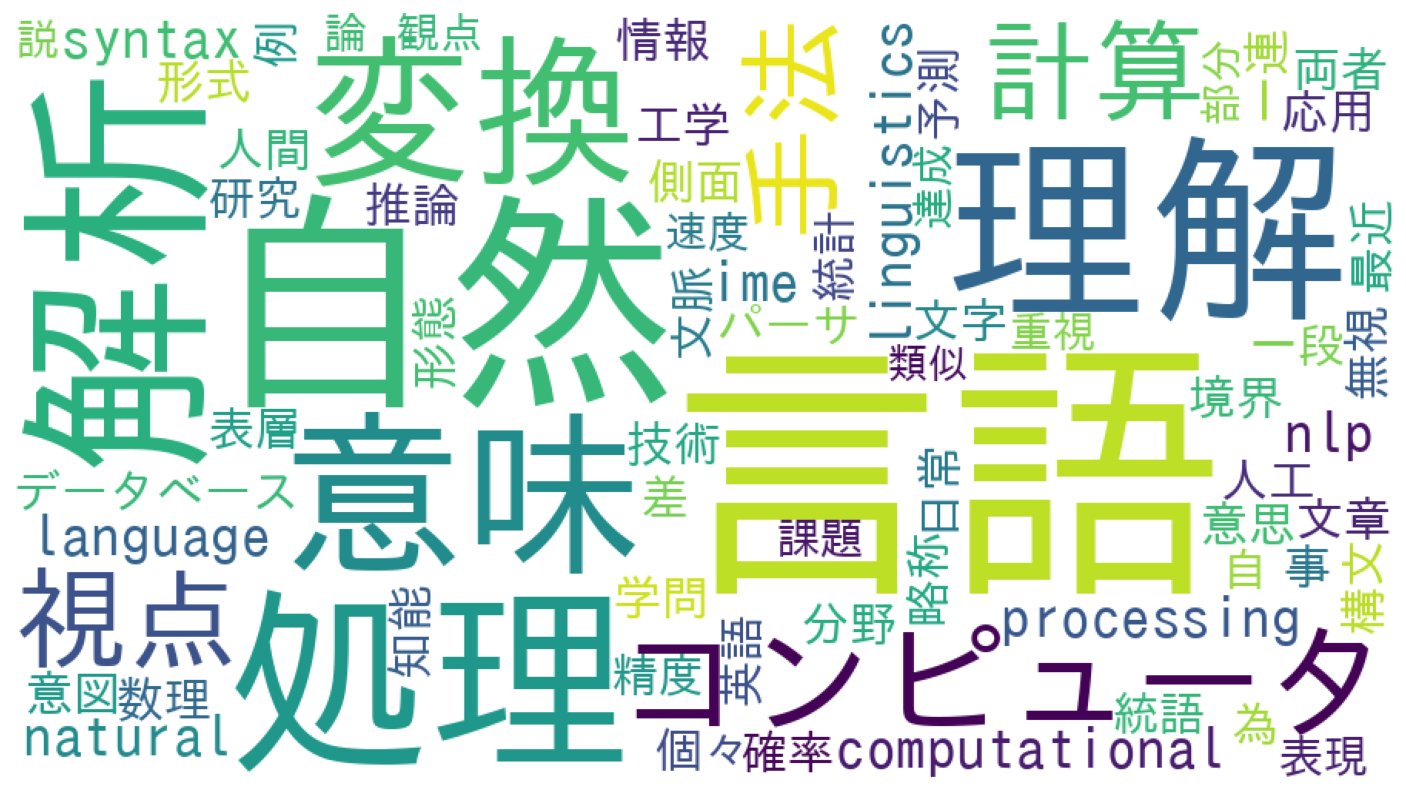

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

font_path = "/usr/share/fonts/truetype/fonts-japanese-gothic.ttf"
wc = WordCloud(background_color="white",width=900, height=500, font_path=font_path).generate_from_frequencies(tfidf_dict)
plt.figure(figsize=(18,10))
plt.axis("off")
plt.imshow(wc)


* 正規表現数問
* BeautifulSoup何かしら
* word2vec
* 単語カウントとdataframe化・可視化
* tf-idf
* wordcloud